In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.DataFrame({
        'A b': [], 
        'c D': []
})
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
# df.columns.apply(col.lower().replace(' ', '_'))  # 'Index' object has no attribute 'apply'
df

,a_b,c_d


In [46]:
%load_ext memory_profiler

In [28]:
def sm():
    """исследуемая функция"""
    sm = 0
    for i in range(1000):
        sm += i
    return sm


In [4]:
%timeit sm()

70.9 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%memit sm()

peak memory: 119.87 MiB, increment: 0.11 MiB


In [3]:
%prun sm()


In [44]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [49]:
%mprun -f sm

ERROR: Could not find file <ipython-input-28-1c6147451ae2>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.



In [5]:
%lprun -f sm()

C:\ProgramData\Anaconda3\lib\site-packages\line_profiler\line_profiler.py:344: UserWarning: Could not extract a code object for the object 499500
  profile = LineProfiler(*funcs)


In [6]:
import line_profiler
lp = line_profiler.LineProfiler()
lp.add_function(sm)
lp.runctx('sm()', locals=locals(), globals=globals())
lp.print_stats()

Timer unit: 3.3094e-07 s

Total time: 0.00104279 s
File: <ipython-input-2-4a243120c7e7>
Function: sm at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sm():
     2         1          5.0      5.0      0.2      sm = 0
     3      1001       1508.0      1.5     47.9      for i in range(1000):
     4      1000       1637.0      1.6     52.0          sm += i
     5         1          1.0      1.0      0.0      return sm



In [39]:
arr1 = pd.DataFrame(np.random.rand(100, 100))
arr2 = pd.DataFrame(np.random.rand(100, 100))
arr3 = pd.DataFrame(np.random.rand(100, 100))

In [8]:
%%timeit
for i in range(100):
    for j in range(100):
        arr3[i][j] = arr1[i][j] / arr2[i][j]

916 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%memit
arr4 = arr1 / arr2

peak memory: 122.59 MiB, increment: 0.57 MiB


In [43]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %lprun  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %

In [42]:
?arr1.add

In [156]:
df = pd.DataFrame(np.random.normal(size=(1000, 3)),
                                columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,0.029219,-2.903424,-0.500705
1,-0.581401,-0.691049,0.618647
2,1.048681,-1.142982,0.863099
3,-0.674633,0.932612,-0.234586
4,-0.226700,0.619903,0.233450


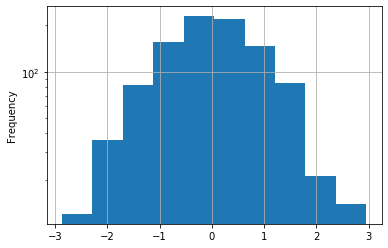

In [127]:
df.b.plot(kind='hist', logy=True, grid=True);

In [51]:
pd.to_datetime(1434340848, unit='s')

Timestamp('2015-06-15 04:00:48')

In [81]:
df.loc[(df.a < -1) & (df.b > 1), 'c']

31   -0.573576
35    0.318506
88    0.095291
Name: c, dtype: float64

In [105]:
import scipy

In [132]:
scipy.stats.shapiro(df)

(0.9995960593223572, 0.8290085792541504)

In [131]:
scipy.stats.normaltest(df)

NormaltestResult(statistic=array([4.10452135, 0.76544463, 1.78599902]), pvalue=array([0.1284442 , 0.68200226, 0.40942583]))

In [172]:
scipy.stats.ttest_ind(df.a[:500], df.a[500:])

Ttest_indResult(statistic=-0.00378764875375555, pvalue=0.9969786577148051)

In [194]:
df['d'] = df.a + 0.1 * abs(df.b)
df

,a,b,c,d
0,0.029219,-2.903424,-0.500705,0.319561
1,-0.581401,-0.691049,0.618647,-0.512296
2,1.048681,-1.142982,0.863099,1.162979
3,-0.674633,0.932612,-0.234586,-0.581372
4,-0.226700,0.619903,0.233450,-0.164710
...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696
996,0.230917,1.234558,-1.935713,0.354372
997,-0.606310,-2.342535,-0.613960,-0.372057
998,0.238668,0.246697,-0.116900,0.263338


In [195]:
scipy.stats.ttest_rel(df['a'], df['d'])

Ttest_relResult(statistic=-41.670442565038016, pvalue=9.760891545699535e-221)

In [198]:
np.mgrid[-3:3:7j, -3:3:7j]

array([[[-3., -3., -3., -3., -3., -3., -3.],
        [-2., -2., -2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]],

       [[-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.]]])

In [205]:
arr = np.arange(6)
arr.resize(2, 3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [206]:
df['e'] = df['d'] / 0
df

,a,b,c,d,e
0,0.029219,-2.903424,-0.500705,0.319561,inf
1,-0.581401,-0.691049,0.618647,-0.512296,-inf
2,1.048681,-1.142982,0.863099,1.162979,inf
3,-0.674633,0.932612,-0.234586,-0.581372,-inf
4,-0.226700,0.619903,0.233450,-0.164710,-inf
...,...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696,-inf
996,0.230917,1.234558,-1.935713,0.354372,inf
997,-0.606310,-2.342535,-0.613960,-0.372057,-inf
998,0.238668,0.246697,-0.116900,0.263338,inf


In [211]:
np.random.randint(0, 10, size=100)

array([8, 3, 0, 5, 1, 6, 5, 3, 6, 6, 3, 0, 7, 2, 6, 7, 1, 7, 0, 7, 2, 7,
       1, 2, 3, 8, 3, 3, 1, 0, 0, 1, 4, 3, 8, 9, 9, 6, 5, 8, 6, 0, 8, 0,
       8, 2, 9, 6, 0, 0, 6, 3, 4, 8, 2, 2, 4, 5, 3, 2, 9, 5, 7, 0, 4, 7,
       9, 6, 0, 9, 8, 2, 3, 8, 2, 1, 1, 4, 9, 5, 7, 1, 5, 7, 5, 7, 2, 0,
       8, 1, 7, 6, 6, 5, 2, 0, 1, 0, 9, 5])

In [7]:
from tqdm import tqdm
import time

pbar = tqdm(["a","b","c","d", "e", "f", "g"])
for c in pbar:
    if c == 'c':
        time.sleep(1.5)
    time.sleep(0.5)
    pbar.set_description("Processing %s"%c)

Processing g: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.38it/s]


In [4]:
from tqdm.notebook import tqdm
import time

#totalParameter установка общей длины индикатора выполнения
with tqdm(total=100) as pbar:
  for i in range(100):
    time.sleep(0.05)
    # Обновлять длину индикатора выполнения каждый раз
    pbar.update(1)

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

df = pd.DataFrame(np.random.randint(0, 100, (10000000, 6)))

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# (can use `tqdm.gui.tqdm`, `tqdm.notebook.tqdm`, optional kwargs, etc.)
# tqdm.pandas(desc="my bar!")
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
df.progress_apply(lambda x: x**2)
# can also groupby:
# df.groupby(0).progress_apply(lambda x: x**2)

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,0,1,2,3,4,5
0,6561,6561,961,5041,64,2500
1,4624,7225,4,1156,7396,1024
2,1296,7744,5184,0,2304,8464
3,5929,5776,1849,7225,8464,1225
4,9,6561,49,8100,441,121
...,...,...,...,...,...,...
9999995,7921,36,100,676,441,3844
9999996,9216,7056,5184,441,2500,484
9999997,4356,256,196,2916,4356,0
9999998,361,2025,324,36,4096,9604


In [3]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

In [5]:
pd.DataFrame(np.random.randint(0, 11, (3, 3)), columns=list('ABC'))

,A,B,C
0,4,1,4
1,5,1,4
2,9,7,2


In [14]:
df = pd.DataFrame({'gender': np.random.choice(['m', 'f'], size=50), 'math_score': np.random.randint(0, 101, 50)})
df

,gender,math_score
0,f,61
1,f,63
2,f,52
3,f,67
4,m,92
5,m,19
6,m,74
7,f,3
8,m,98
9,m,40


In [18]:
df.sort_values(['gender','math_score'], ascending=[True, False])\
    .groupby('gender')\
    .head(5)

,gender,math_score
44,f,97
49,f,96
10,f,93
18,f,90
20,f,89
16,m,100
8,m,98
21,m,98
26,m,94
4,m,92


In [21]:
df.values.nbytes

800

In [26]:
np.random.seed(42)

In [27]:
np.random.randint(0, 10, 4)

array([6, 3, 7, 4])

In [28]:
np.random.randint(0, 10, 4)

array([6, 9, 2, 6])

In [29]:
np.random.seed(42)

In [30]:
np.random.randint(0, 10, 4)

array([6, 3, 7, 4])

In [31]:
np.random.randint(0, 10, 4)

array([6, 9, 2, 6])

In [33]:
rng = np.random.RandomState(42)

In [34]:
rng.randint(0, 10, 4)

array([6, 3, 7, 4])

In [35]:
rng.randint(0, 10, 4)

array([6, 9, 2, 6])

In [36]:
rng = np.random.RandomState(42)

In [37]:
rng.randint(0, 10, 4)

array([6, 3, 7, 4])

In [38]:
rng.randint(0, 10, 4)

array([6, 9, 2, 6])

In [33]:
df = pd.DataFrame(np.random.randint(0, 100, (10000, 100)))

In [4]:
from tqdm import tqdm
tqdm.pandas()

In [35]:
df.progress_applymap(lambda x: np.sin(x))
# progress_map()

100%|████████████████████████████| 1000000/1000000 [00:04<00:00, 209149.29it/s]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.992873,-0.536573,0.017702,0.670229,0.920026,-0.026551,0.296369,-0.905578,0.412118,-0.966118,...,0.963795,0.893997,0.901788,0.762558,0.999912,-0.544021,-0.245252,0.656987,-0.676772,0.986628
1,-0.132352,0.017702,-0.750987,-0.993889,-0.756802,0.656987,0.436165,0.551427,-0.993889,-0.916522,...,0.656987,-0.831775,-0.676772,-0.905578,0.989358,-0.428183,0.436165,0.999520,0.412118,0.992873
2,-0.905578,-0.831775,0.986628,0.395925,0.296369,-0.558789,-0.821818,0.395925,-0.404038,0.762558,...,0.733190,0.826829,0.989358,-0.304811,0.826829,-0.176076,-0.643538,0.968364,0.149877,-0.756802
3,-0.444113,-0.245252,0.513978,-0.821818,0.745113,0.990607,0.920026,0.566108,0.850904,-0.905578,...,0.105988,0.270906,0.395925,0.983588,-0.923458,-0.158623,0.551427,0.270906,-0.245252,0.826829
4,0.986628,-0.287903,0.513978,-0.750987,-0.428183,-0.855520,-0.026551,-0.176076,-0.026551,0.656987,...,-0.768255,-0.905578,-0.961397,-0.821818,-0.245252,-0.132352,-0.287903,-0.573382,0.773891,0.860069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.132352,0.149877,0.683262,-0.008851,0.035398,-0.521551,-0.999990,-0.663634,0.990607,0.105988,...,-0.966118,-0.404038,0.650288,0.529083,-0.387782,-0.855520,-0.643538,-0.916522,-0.158623,0.745113
9996,0.912945,-0.750987,0.412118,0.636738,-0.993889,-0.279415,-0.676772,-0.404038,-0.739181,-0.404038,...,0.893997,-0.245252,-0.114785,-0.629888,-0.026551,-0.544021,-0.831775,-0.846220,0.253823,-0.953753
9997,-0.916522,-0.988032,-0.663634,-0.831775,0.999520,0.893997,-0.262375,-0.629888,-0.988032,-0.988032,...,0.000000,-0.132352,0.566108,-0.387782,-0.821818,0.920026,-0.663634,-0.750987,0.951055,0.566108
9998,0.762558,-0.629888,-0.279415,0.017702,-0.676772,-0.132352,0.035398,-0.573382,0.836656,0.841471,...,-0.262375,-0.521551,-0.287903,0.956376,0.893997,0.683262,-0.988032,-0.008851,0.270906,0.745113


In [31]:
df[0].progress_map(lambda x: np.sin(x))

100%|████████████████████████████████| 10000/10000 [00:00<00:00, 161280.93it/s]


0       0.683262
1      -0.923458
2      -0.999755
3      -0.387782
4      -0.993889
          ...   
9995   -0.993889
9996   -0.026551
9997    0.683262
9998   -0.905578
9999   -0.026551
Name: 0, Length: 10000, dtype: float64

In [3]:
dti = pd.to_datetime(
    ["1/1/2018", np.datetime64("2018-01-01")]
)

In [11]:
dti[0]

Timestamp('2018-01-01 00:00:00')

In [7]:
dti[0].day_name()

'Monday'

In [47]:
data = pd.Timestamp("1972-04-15")

In [19]:
data.day_name()

'Saturday'

In [50]:
data.weekday()

5

In [20]:
data.month_name()

'April'

In [21]:
data.year

1972

In [22]:
data.month

4

In [23]:
data.week

15

In [24]:
data.day

15

In [38]:
data + pd.Timedelta("1 day")

Timestamp('1972-04-16 00:00:00')

In [46]:
data + pd.Timedelta(seconds=1)

Timestamp('1972-04-15 00:00:01')

In [6]:
df = pd.DataFrame(np.random.randint(1, 10, 40))
df['cut'] = pd.cut(df[0], (2, 5, 7))

In [7]:
df

,0,cut
0,7,"(5.0, 7.0]"
1,1,NaN
2,7,"(5.0, 7.0]"
3,3,"(2.0, 5.0]"
4,4,"(2.0, 5.0]"
5,6,"(5.0, 7.0]"
6,8,NaN
7,5,"(2.0, 5.0]"
8,2,NaN
9,9,NaN


In [9]:
pd.cut(df[0], 3)[:10]
# а почему такое странное деление с границей на 0.992?

0      (6.333, 9.0]
1    (0.992, 3.667]
2      (6.333, 9.0]
3    (0.992, 3.667]
4    (3.667, 6.333]
5    (3.667, 6.333]
6      (6.333, 9.0]
7    (3.667, 6.333]
8    (0.992, 3.667]
9      (6.333, 9.0]
Name: 0, dtype: category
Categories (3, interval[float64]): [(0.992, 3.667] < (3.667, 6.333] < (6.333, 9.0]]

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
arr2 = arr[-3:]
arr2[:] = 10
arr2

array([10, 10, 10])

In [6]:
arr  # исходный массив меняется!

array([ 0,  1,  2,  3,  4,  5,  6, 10, 10, 10])

In [9]:
arr = np.arange(10)
arr2 = arr[arr > 6]
arr2[:] = 10
arr  # маскиролание создает копию

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
arr = np.arange(10)
arr2 = arr[[7, 8, 9]]
arr2[:] = 10
arr  # прихотливая индексация тоже создает копию

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
arr = np.random.randint(15, 45, (5, 5))
arr

array([[26, 16, 19, 42, 42],
       [16, 38, 17, 24, 40],
       [24, 28, 41, 43, 23],
       [20, 27, 30, 29, 17],
       [44, 35, 22, 31, 42]])

In [46]:
(arr < 20) + (arr > 40)

array([[False,  True,  True,  True,  True],
       [ True, False,  True, False, False],
       [False, False,  True,  True, False],
       [False, False, False, False,  True],
       [ True, False, False, False,  True]])

In [47]:
arr < 20

array([[False,  True,  True, False, False],
       [ True, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

In [48]:
(arr > 40)

array([[False, False, False,  True,  True],
       [False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False, False, False, False],
       [ True, False, False, False,  True]])

In [50]:
mask = np.array([[True if i == j else False for i in range(5)] for j in range(5)])

In [51]:
arr[mask]

array([26, 38, 41, 29, 42])

In [52]:
arr[[range(5)], [range(5)]]  # прихотливая индексация

array([[26, 38, 41, 29, 42]])

In [54]:
i = np.array([*range(5)])
arr[i, i]

array([26, 38, 41, 29, 42])